A base possui as seguintes colunas, após a tranformação:

| Atributo                   | Descrição                                                                               | Escala                  | Tipo                  |
|----------------------------|-----------------------------------------------------------------------------------------|-------------------------|-----------------------|
| timedelta                  | Dias entre a publicação do artigo e a aquisição do conjunto de dados                    | Intervalar              | Quantitativo - Contínuo |
| n_tokens_title             | Número de palavras no título                                                            | Racional                | Quantitativo - Discreto |
| n_tokens_content           | Número de palavras no conteúdo                                                          | Racional                | Quantitativo - Discreto |
| n_unique_tokens            | Taxa de palavras únicas no conteúdo                                                     | Racional                | Quantitativo - Contínuo |
| num_hrefs                  | Número de links                                                                         | Racional                | Quantitativo - Discreto |
| num_self_hrefs             | Número de links para outros artigos publicados pela Mashable                            | Racional                | Quantitativo - Discreto |
| num_imgs                   | Número de imagens                                                                       | Racional                | Quantitativo - Discreto |
| num_videos                 | Número de vídeos                                                                        | Racional                | Quantitativo - Discreto |
| num_keywords               | Número de palavras chave nos metadados                                                  | Racional                | Quantitativo - Discreto |
| channel                    | Canal de publicação: Lifestyle, Entertainment, Business, Social Media, Tech, World.     | Nominal                 | Qualitativo
| weekday                    | Dia da semana de publicação: Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday. | Nominal            | Qualitativo
| global_subjectivity        | Subjetividade de texto                                                                  | Racional                | Quantitativo - Contínuo |
| global_sentiment_polarity  | Polaridade do sentimento de texto                                                       | Racional                | Quantitativo - Contínuo |
| global_rate_positive_words | Taxa de palavras positivas no conteúdo                                                  | Racional                | Quantitativo - Contínuo |
| global_rate_negative_words | Taxa de palavras negativas no conteúdo                                                  | Racional                | Quantitativo - Contínuo |
| title_subjectivity         | Subjetividade do título                                                                 | Racional                | Quantitativo - Contínuo |
| title_sentiment_polarity   | Polaridade do título                                                                    | Racional                | Quantitativo - Contínuo |
| shares                     | Number of shares (target)                                                               | Racional                | Quantitativo - Discreto |

In [1]:
# Importação de pacotes necessários para este laboratório

import seaborn as sns #Visualização
import matplotlib.pyplot as plt #Visualização
import pandas as pd #Biblioteca Pandas para os dados

In [2]:
def transform_data(dataset):
    
    # Colunas com informações de Channel 

    melt_columns_channel = [
        'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed',
        'data_channel_is_tech', 'data_channel_is_world'
    ]

    # Demais colunas do dataset

    all_columns_channel = [column for column in dataset.columns if column not in melt_columns_channel]

    # Transformação da base de dados 

    data_final = pd.melt(dataset, id_vars=all_columns_channel, value_vars=melt_columns_channel, var_name='channel', value_name='channel_value')
    data_final = data_final[data_final['channel_value'] != 0]
    data_final['channel'] =data_final['channel'].str.split("_").str[-1]
    data_final.drop(columns=['channel_value'], inplace=True)
    data_final.reset_index(inplace=True)
    
    
    # Colunas com informações do weekday 
    melt_columns_weekday = ['weekday_is_monday', 'weekday_is_tuesday', 
        'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday'
    ]

    # Demais colunas do dataset
    all_columns_weekday = [column for column in data_final.columns if column not in melt_columns_weekday]


    data_final = pd.melt(data_final, id_vars=all_columns_weekday, value_vars=melt_columns_weekday, var_name='weekday', value_name='weekday_value')
    data_final = data_final[data_final['weekday_value'] != 0]
    data_final['weekday'] =data_final['weekday'].str.split("_").str[-1]
    data_final.drop(columns=['weekday_value'], inplace=True)
    data_final.reset_index(inplace=True)

    # Selecionando colunas de interesse 

    data_final = data_final[['timedelta', 'n_tokens_title',
       'n_tokens_content', 'n_unique_tokens','num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'num_keywords', 'channel', 'weekday', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'title_subjectivity',
       'title_sentiment_polarity', 'shares']]
    

    return data_final





In [30]:
#Preparando os dados
data_pop = pd.read_csv("../datasets/OnlineNewsPopularity.csv")
data_pop.columns = [column.strip() for column in data_pop.columns] # corrige o problema de ter espaço nos nomes das colunas 
data_pop = transform_data(data_pop)
data_pop.head() #teste



,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,channel,weekday,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,731.0,8.0,960.0,0.418163,21.0,20.0,20.0,0.0,10.0,lifestyle,monday,0.514480,0.268303,0.080208,0.016667,0.000000,0.000000,556
1,731.0,10.0,187.0,0.666667,7.0,0.0,1.0,0.0,7.0,lifestyle,monday,0.477165,0.150000,0.026738,0.010695,0.000000,0.000000,1900
2,731.0,11.0,103.0,0.689320,3.0,1.0,1.0,0.0,6.0,lifestyle,monday,0.423611,0.118056,0.029126,0.009709,0.857143,-0.714286,5700
3,731.0,10.0,243.0,0.619247,1.0,1.0,0.0,0.0,10.0,lifestyle,monday,0.517984,0.155603,0.049383,0.020576,0.000000,0.000000,462
4,731.0,8.0,204.0,0.586207,7.0,2.0,1.0,0.0,8.0,lifestyle,monday,0.651940,0.316986,0.073529,0.004902,0.000000,0.000000,3600


In [4]:
#Análise

data_pop.shape #Obter Atributos e instâncias


(33510, 18)

In [5]:
data_pop.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,num_keywords,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000,33510.000000
mean,353.106058,10.416204,585.438317,0.549702,10.380603,3.368517,3.959445,0.998448,7.177798,0.439569,0.119596,0.039891,0.016320,0.265740,0.068661,2928.637989
std,213.543598,2.134557,483.838530,3.828350,10.599809,3.883522,7.725860,3.651955,1.952422,0.099129,0.090615,0.016444,0.009943,0.314245,0.252802,9470.520277
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.377657,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,164.000000,9.000000,272.000000,0.467396,4.000000,1.000000,1.000000,0.000000,6.000000,0.393133,0.062231,0.028889,0.009768,0.000000,0.000000,930.000000
50%,336.000000,10.000000,447.000000,0.532596,7.000000,3.000000,1.000000,0.000000,7.000000,0.447111,0.119719,0.039164,0.015209,0.100000,0.000000,1400.000000
75%,541.000000,12.000000,761.000000,0.600000,13.000000,4.000000,3.000000,1.000000,9.000000,0.497383,0.175602,0.050205,0.021277,0.500000,0.136364,2500.000000
max,731.000000,23.000000,8474.000000,701.000000,304.000000,116.000000,128.000000,75.000000,10.000000,1.000000,0.727841,0.155488,0.139831,1.000000,1.000000,690400.000000


In [20]:

#data_pop.min() # Todos valores

data_temp = data_pop[['timedelta','n_tokens_title','n_tokens_content','n_unique_tokens','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords','global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words','title_subjectivity','title_sentiment_polarity','shares']]
(data_temp.std()/ data_temp.mean()*100).sort_values(ascending=True) # Variação de valores númericos em porcentagem

n_tokens_title                 20.492658
global_subjectivity            22.551382
num_keywords                   27.200850
global_rate_positive_words     41.222647
timedelta                      60.475767
global_rate_negative_words     60.921283
global_sentiment_polarity      75.767584
n_tokens_content               82.645518
num_hrefs                     102.111694
num_self_hrefs                115.288786
title_subjectivity            118.252430
num_imgs                      195.124830
shares                        323.376270
num_videos                    365.763047
title_sentiment_polarity      368.189188
n_unique_tokens               696.441528
dtype: float64

In [18]:
data_temp = data_pop[['timedelta','n_tokens_title','n_tokens_content','n_unique_tokens','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords','channel','weekday','global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words','title_subjectivity','title_sentiment_polarity','shares']]
data_temp.dtypes

timedelta                     float64
n_tokens_title                float64
n_tokens_content              float64
n_unique_tokens               float64
num_hrefs                     float64
num_self_hrefs                float64
num_imgs                      float64
num_videos                    float64
num_keywords                  float64
channel                        object
weekday                        object
global_subjectivity           float64
global_sentiment_polarity     float64
global_rate_positive_words    float64
global_rate_negative_words    float64
title_subjectivity            float64
title_sentiment_polarity      float64
shares                          int64
dtype: object

<AxesSubplot:xlabel='weekday', ylabel='shares'>

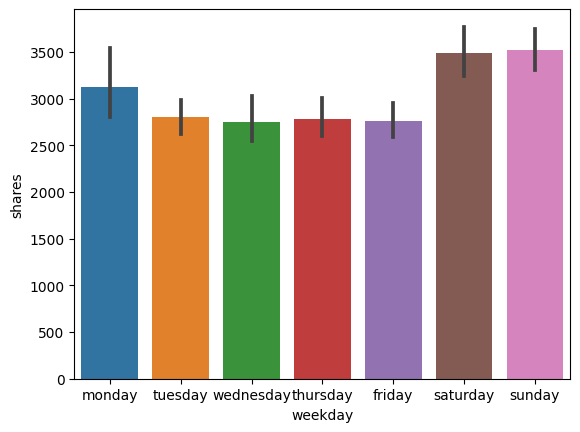

In [23]:
#sns.boxplot(x="channel", y="shares", data= data_pop, showfliers = False)

sns.barplot(data=data_pop, x="weekday",y="shares")


<AxesSubplot:xlabel='channel', ylabel='shares'>

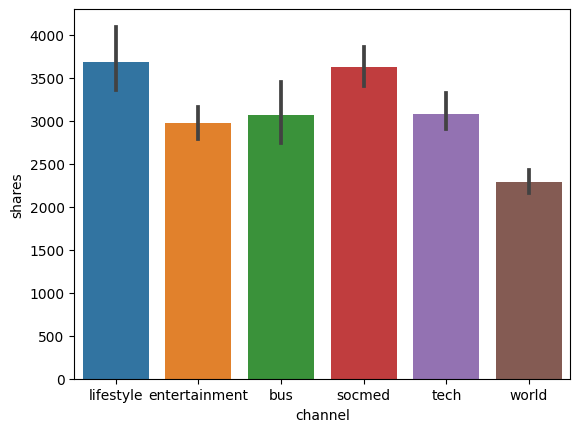

In [27]:
#sns.boxplot(x="weekday", y="shares", data= data_pop, showfliers = False)
sns.barplot(data=data_pop, x="channel",y="shares")

<AxesSubplot:>

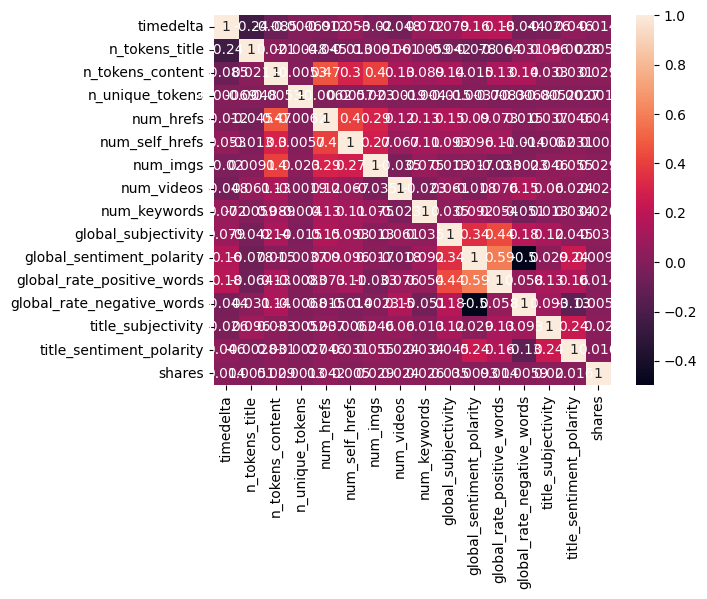

In [53]:
data_corr = data_pop[['timedelta','n_tokens_title','n_tokens_content','n_unique_tokens','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords','global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words','title_subjectivity','title_sentiment_polarity','shares']].corr()
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns, annot=True)

<AxesSubplot:>

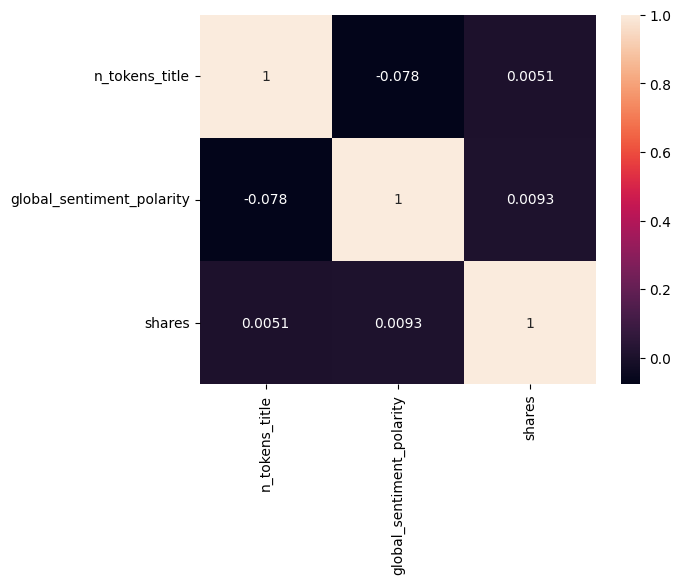

In [54]:
data_corr = data_pop[['n_tokens_title','global_sentiment_polarity','shares']].corr()
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns, annot=True)